<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w5_d2_classif_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge: Classification with Neural Networks in TensorFlow


🛠️ What you will create
A Neural Network model for classification using TensorFlow
Visualizations of data distribution and decision boundaries
Model performance evaluation on training and test sets
Experimentation with activation functions and optimizers


What You Need to Do
1. Understand Classification Types

Read about Binary Classification, Multi-class Classification, and Multi-label Classification.
Write a brief explanation of each type with an example.


2. Set Up Your Python Environment and dataset

Ensure you have the required libraries installed:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles


It is time for creating a dataset to work on:

from sklearn.datasets import make_circles

samples = 1000
X, y = make_circles(samples,
                    noise = 0.03,
                    random_state = 42)

print('X : ', X)
print('\n')
print('y : ', y)


Visualize the dataset using scatter plots to understand the data distribution.


3. Build a Basic Neural Network Model

Create a Sequential Model in TensorFlow with one dense layer.
Use Binary Crossentropy as the loss function.
Train the model and check the accuracy.


4. Improve the Model

Add more layers and neurons to the model.
Train the model for more epochs.
Try different optimizers like Adam instead of SGD.


5. Visualize the Decision Boundary

Implement a function plot_decision_boundary() to visualize model predictions.
Plot decision boundaries for different models and compare results.


6. Incorporate Activation Functions

Explore ReLU and Sigmoid activation functions.
Modify the neural network to include these activation functions.
Train the new model and compare performance.


7. Split Data into Training and Testing Sets

Use 80% data for training and 20% for testing.
Train the improved model on the training set.
Evaluate model performance on the test set.


8. Evaluate and Visualize Final Model Performance

Check loss and accuracy on the test set.
Use plot_decision_boundary() to visualize predictions for both training and test data.
Compare results and analyze improvements.


9. Summarize Key Takeaways

Write a short summary of what you learned.
Highlight the importance of visualizing data and tuning hyperparameters to improve classification models.


# Classification types

* Binary classification: Two possible classes (0/1). Example: whether an email is spam or not spam.

* Multi-class classification: More than two mutually exclusive classes. Example: recognizing handwritten digits (0–9) in the MNIST dataset.

* Multi-label classification: Each sample can belong to multiple classes at the same time. Example: an image can be labeled as ["cat", "indoor", "night"] simultaneously.

X shape: (1000, 2) y shape: (1000,)


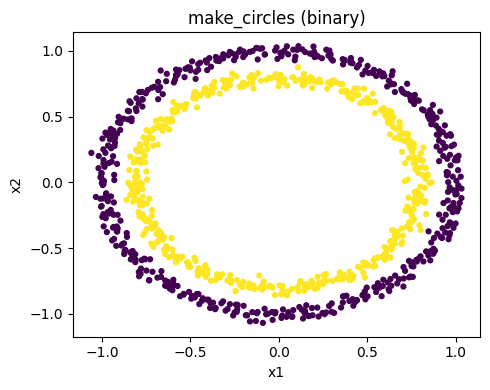

In [3]:
# import, data, visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# reproductibility
np.random.seed(42)
tf.random.set_seed(42)

# dataset: circles
samples = 1000
X, y = make_circles(n_samples=samples, noise=0.03, random_state=42)

print('X shape:', X.shape, 'y shape:', y.shape)

# scatter
plt.figure(figsize=(5,4))
plt.scatter(X[:,0], X[:,1], c=y, s=12)
plt.title("make_circles (binary)")
plt.xlabel("x1"); plt.ylabel("x2"); plt.tight_layout(); plt.show()


In [4]:
#split train/test

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
# basic NN & Binary Crossentropy

basic_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

basic_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    metrics=["accuracy"]
)

hist_basic = basic_model.fit(X_train, y_train, epochs=100, verbose=0)
loss, acc = basic_model.evaluate(X_test, y_test, verbose=0)
print(f"[Basic] test loss={loss:.4f}, acc={acc:.4f}")


[Basic] test loss=0.6939, acc=0.4600


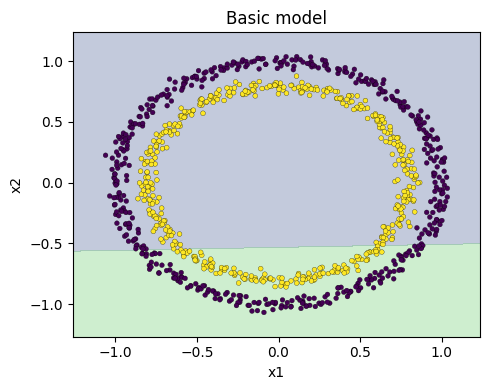

In [6]:
# plot_decision_boundary (model)

def plot_decision_boundary(model, X, y, title="Decision boundary"):
    # grid dense on datas
    x_min, x_max = X[:,0].min()-0.2, X[:,0].max()+0.2
    y_min, y_max = X[:,1].min()-0.2, X[:,1].max()+0.2
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    # predictions (probability)
    probs = model.predict(grid, verbose=0).ravel()
    # reshape to map
    Z = (probs >= 0.5).astype(int).reshape(xx.shape)

    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, Z, alpha=0.3, levels=1)
    plt.scatter(X[:,0], X[:,1], c=y, s=12, edgecolor="k", linewidth=0.2)
    plt.title(title); plt.xlabel("x1"); plt.ylabel("x2")
    plt.tight_layout(); plt.show()

plot_decision_boundary(basic_model, X, y, title="Basic model")


[Improved] test loss=0.0018, acc=1.0000


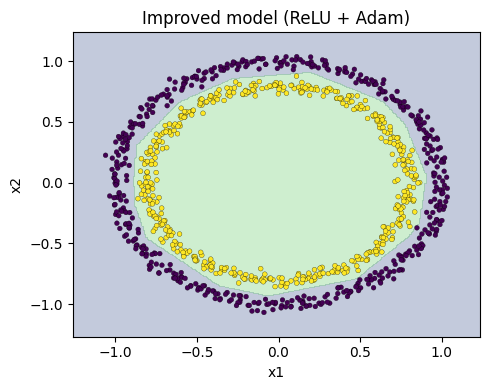

In [7]:
# model improving & Adam, ReLU

improved_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(8, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

improved_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy"]
)

hist_improved = improved_model.fit(X_train, y_train, epochs=200, verbose=0)
loss_i, acc_i = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"[Improved] test loss={loss_i:.4f}, acc={acc_i:.4f}")

plot_decision_boundary(improved_model, X, y, title="Improved model (ReLU + Adam)")


ReLU test: [0.0030791766475886106, 1.0]


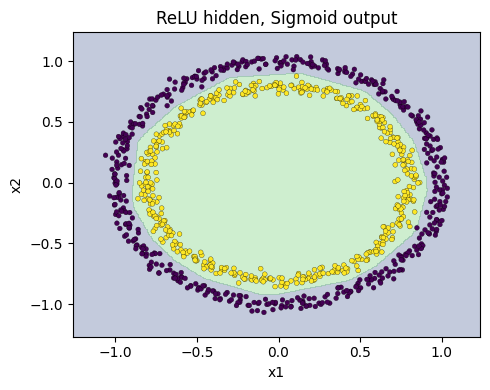

Sigmoid test: [0.003375155385583639, 1.0]


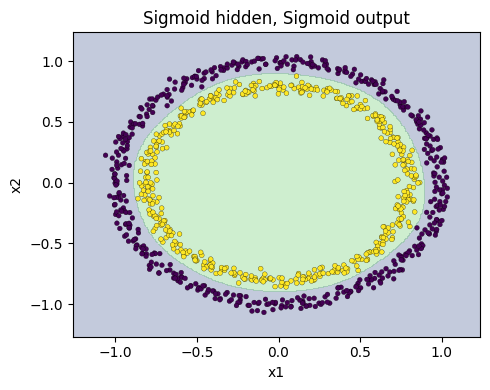

In [8]:
# experiment with activations (Sigmoid vs ReLU)
relu_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
relu_model.compile(
    loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"]
)
relu_model.fit(X_train, y_train, epochs=200, verbose=0)
print("ReLU test:", relu_model.evaluate(X_test, y_test, verbose=0))
plot_decision_boundary(relu_model, X, y, title="ReLU hidden, Sigmoid output")

sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(16, activation="sigmoid"),
    tf.keras.layers.Dense(16, activation="sigmoid"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
sigmoid_model.compile(
    loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(0.01), metrics=["accuracy"]
)
sigmoid_model.fit(X_train, y_train, epochs=200, verbose=0)
print("Sigmoid test:", sigmoid_model.evaluate(X_test, y_test, verbose=0))
plot_decision_boundary(sigmoid_model, X, y, title="Sigmoid hidden, Sigmoid output")


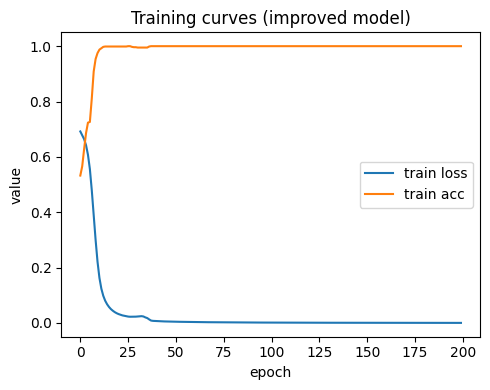

Final Test — loss: 0.0018, acc: 1.0000


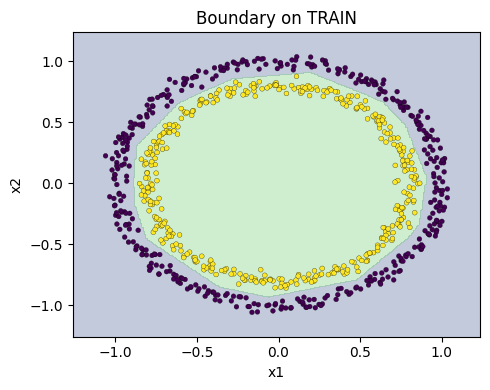

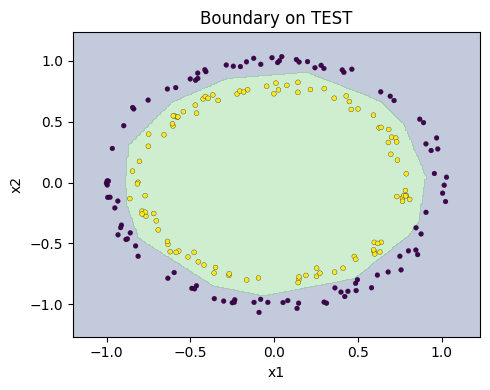

In [9]:
#visualisation
# hystoric train for improved_model
plt.figure(figsize=(5,4))
plt.plot(hist_improved.history["loss"], label="train loss")
plt.plot(hist_improved.history.get("accuracy", []), label="train acc")
plt.title("Training curves (improved model)")
plt.xlabel("epoch"); plt.ylabel("value"); plt.legend(); plt.tight_layout(); plt.show()

# final evaluation on test
test_loss, test_acc = improved_model.evaluate(X_test, y_test, verbose=0)
print(f"Final Test — loss: {test_loss:.4f}, acc: {test_acc:.4f}")

# decisions on train vs test
plot_decision_boundary(improved_model, X_train, y_train, title="Boundary on TRAIN")
plot_decision_boundary(improved_model, X_test,  y_test,  title="Boundary on TEST")


Key Takeaways

In this challenge, I learned how to build, train, and improve a neural network for binary classification using TensorFlow.
I explored how model architecture (number of layers and neurons), activation functions, and optimizers affect performance and decision boundaries.
Visualizing data and model predictions proved essential for understanding how the network learns and for detecting underfitting or overfitting.
Finally, tuning hyperparameters such as learning rate, epochs, and layer configuration significantly improved model accuracy and generalization.
This exercise showed that effective classification is not just about building a model — it’s about seeing, understanding, and adjusting how the model learns.